In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import shutil

# Define directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"
output_dir = "/kaggle/working/strategy1_dataset"  # Directory to save strategy1 files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to save strategy1 files from a directory
def save_strategy1_files(source_dir, target_dir):
    count = 0
    for file in os.listdir(source_dir):
        if file.endswith(".npy") and "strategy1" in file:  # Check for strategy1 files
            source_path = os.path.join(source_dir, file)
            target_path = os.path.join(target_dir, file)
            shutil.copy(source_path, target_path)  # Copy file to target directory
            count += 1
    return count

# Main execution
if __name__ == "__main__":
    print("Saving strategy1 files...")

    # Process Benign directory
    benign_count = save_strategy1_files(benign_dir, output_dir)
    print(f"Saved {benign_count} strategy1 files from Benign directory.")

    # Process Malignant directory
    malignant_count = save_strategy1_files(malignant_dir, output_dir)
    print(f"Saved {malignant_count} strategy1 files from Malignant directory.")

    print(f"\nTotal strategy1 files saved: {benign_count + malignant_count}")
    print(f"Files are saved in: {output_dir}")



Saving strategy1 files...
Saved 2676 strategy1 files from Benign directory.
Saved 2308 strategy1 files from Malignant directory.

Total strategy1 files saved: 4984
Files are saved in: /kaggle/working/strategy1_dataset


In [3]:
import os
import shutil

# Define directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"
output_dir = "/kaggle/working/strategy1_dataset"

# Subdirectories for benign and malignant
output_benign = os.path.join(output_dir, "benign")
output_malignant = os.path.join(output_dir, "malignant")

# Function to clean output directories
def clean_directory(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)

# Function to copy and rename files with labels
def save_and_label_files(source_dir, target_dir, label):
    count = 0
    for file in os.listdir(source_dir):
        if file.endswith(".npy") and "strategy1" in file:
            source_path = os.path.join(source_dir, file)
            # Modify filename to include label
            base_name = "_".join(file.split("_")[:3])  # Keeps augmented_strategy1_3548
            new_file = f"{base_name}_{label}.npy"     # Add label _0_ or _1_
            target_path = os.path.join(target_dir, new_file)
            shutil.copy(source_path, target_path)
            count += 1
    return count

# Main execution
if __name__ == "__main__":
    print("Cleaning output directories...")
    clean_directory(output_dir)
    clean_directory(output_benign)
    clean_directory(output_malignant)
    
    print("Saving and labeling strategy1 files...")

    # Process Benign directory with _0_ label
    benign_count = save_and_label_files(benign_dir, output_benign, "0")
    print(f"Saved and labeled {benign_count} strategy1 files from Benign directory.")

    # Process Malignant directory with _1_ label
    malignant_count = save_and_label_files(malignant_dir, output_malignant, "1")
    print(f"Saved and labeled {malignant_count} strategy1 files from Malignant directory.")

    print("\nSummary:")
    print(f"Benign files saved: {benign_count}")
    print(f"Malignant files saved: {malignant_count}")
    print(f"Files are saved in: {output_dir}")


Cleaning output directories...
Saving and labeling strategy1 files...
Saved and labeled 2676 strategy1 files from Benign directory.
Saved and labeled 2308 strategy1 files from Malignant directory.

Summary:
Benign files saved: 2676
Malignant files saved: 2308
Files are saved in: /kaggle/working/strategy1_dataset


In [4]:
import os
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# 2. Define Directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"

# 3. Compute Dataset-Specific Mean and Std (Parallelized)
def process_file(file_path):
    image = np.load(file_path).astype(np.float32) / 255.0
    return np.sum(image, axis=(0, 1)), np.sum(image ** 2, axis=(0, 1)), image.shape[0] * image.shape[1]

def compute_mean_std(data_dirs):
    sum_images = 0.0
    sum_squared_images = 0.0
    num_pixels = 0
    file_paths = []

    for data_dir in data_dirs:
        file_paths += [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.npy')]

    with ThreadPoolExecutor() as executor:
        results = list(executor.map(process_file, file_paths))

    for s, s2, pixels in results:
        sum_images += s
        sum_squared_images += s2
        num_pixels += pixels

    mean = sum_images / num_pixels
    std = np.sqrt((sum_squared_images / num_pixels) - mean ** 2)
    return mean, std

mean, std = compute_mean_std([benign_dir, malignant_dir])
print(f"Computed Mean: {mean}, Std: {std}")

Computed Mean: [0.00237972 0.0023751  0.00174674], Std: [0.00088792 0.00102896 0.00067923]


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
import numpy as np
import os

# 1. Data Paths
benign_dir = "/kaggle/working/strategy1_dataset/benign"
malignant_dir = "/kaggle/working/strategy1_dataset/malignant"

# Collect all file paths
benign_files = [os.path.join(benign_dir, f) for f in os.listdir(benign_dir) if f.endswith('.npy')]
malignant_files = [os.path.join(malignant_dir, f) for f in os.listdir(malignant_dir) if f.endswith('.npy')]

# Split data into train and test
benign_train, benign_test = train_test_split(benign_files, test_size=0.2, random_state=42)
malignant_train, malignant_test = train_test_split(malignant_files, test_size=0.2, random_state=42)

# Calculate Class Weights BEFORE initializing dataset
benign_count = len(benign_train)
malignant_count = len(malignant_train)
class_weights = torch.tensor([1.0, benign_count / malignant_count]).to("cuda" if torch.cuda.is_available() else "cpu")

# 2. Custom Dataset
class Custom3ChannelDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.files = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        image = np.load(self.files[idx])

        if image.ndim == 2:
            image = np.stack([image] * 3, axis=0) 
        elif image.shape[0] != 3:
            image = image[:3, :, :] 
        
        image = torch.tensor(image, dtype=torch.float32)
        if self.transform:
            image = self.transform(image)

        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return image, label


In [6]:
# 3. Data Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B4 input size
    transforms.Normalize(mean=[0.00237972, 0.0023751,  0.00174674], std=[0.00088792, 0.00102896, 0.00067923])
])

# 4. Combine Files and Labels
train_files = benign_train + malignant_train
train_labels = [0] * len(benign_train) + [1] * len(malignant_train)

test_files = benign_test + malignant_test
test_labels = [0] * len(benign_test) + [1] * len(malignant_test)

# Initialize Datasets and DataLoaders
train_dataset = Custom3ChannelDataset(train_files, train_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = Custom3ChannelDataset(test_files, test_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Benign Count: {benign_count}, Malignant Count: {malignant_count}")
print(f"Class Weights: {class_weights}")

Benign Count: 2140, Malignant Count: 1846
Class Weights: tensor([1.0000, 1.1593])


In [7]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import torch

# 5. Modified EfficientNet-B4 Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.IMAGENET1K_V1)

# Freeze Early Layers
for name, param in model.named_parameters():
    if "features.6" not in name and "classifier" not in name:  # Only train last block and classifier
        param.requires_grad = False

# Replace Fully Connected Layer (Classifier)
num_ftrs = model.classifier[1].in_features  # Extract the input features of the classifier
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 1)  # Binary classification output (no sigmoid)
)

model = model.to(device)

# 6. Loss Function and Optimizer
# Define BCEWithLogitsLoss with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Ensure `class_weights` is defined

# Optimizer: Use a lower learning rate for earlier layers and higher for the classifier
optimizer = optim.Adam([
    {'params': model.features[6].parameters(), 'lr': 1e-4},  # Last block
    {'params': model.classifier.parameters(), 'lr': 1e-3}    # Classifier
])


Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 161MB/s]


Epoch 1/15 | Train Loss: 0.7188 | Test Loss: 0.6666 | Accuracy: 0.6743 | AUC: 0.7218
Epoch 2/15 | Train Loss: 0.6530 | Test Loss: 0.5841 | Accuracy: 0.7184 | AUC: 0.7995
Epoch 3/15 | Train Loss: 0.5878 | Test Loss: 0.5082 | Accuracy: 0.7786 | AUC: 0.8613
Epoch 4/15 | Train Loss: 0.5229 | Test Loss: 0.4308 | Accuracy: 0.8267 | AUC: 0.9031
Epoch 5/15 | Train Loss: 0.4589 | Test Loss: 0.3591 | Accuracy: 0.8587 | AUC: 0.9391
Epoch 6/15 | Train Loss: 0.4184 | Test Loss: 0.3087 | Accuracy: 0.8858 | AUC: 0.9518
Epoch 7/15 | Train Loss: 0.3503 | Test Loss: 0.2545 | Accuracy: 0.8988 | AUC: 0.9656
Epoch 8/15 | Train Loss: 0.3300 | Test Loss: 0.2125 | Accuracy: 0.9208 | AUC: 0.9750
Epoch 9/15 | Train Loss: 0.3136 | Test Loss: 0.2734 | Accuracy: 0.9078 | AUC: 0.9664
Epoch 10/15 | Train Loss: 0.2742 | Test Loss: 0.2114 | Accuracy: 0.9319 | AUC: 0.9785
Epoch 11/15 | Train Loss: 0.2463 | Test Loss: 0.2206 | Accuracy: 0.9359 | AUC: 0.9791
Epoch 12/15 | Train Loss: 0.2473 | Test Loss: 0.1430 | Accuracy

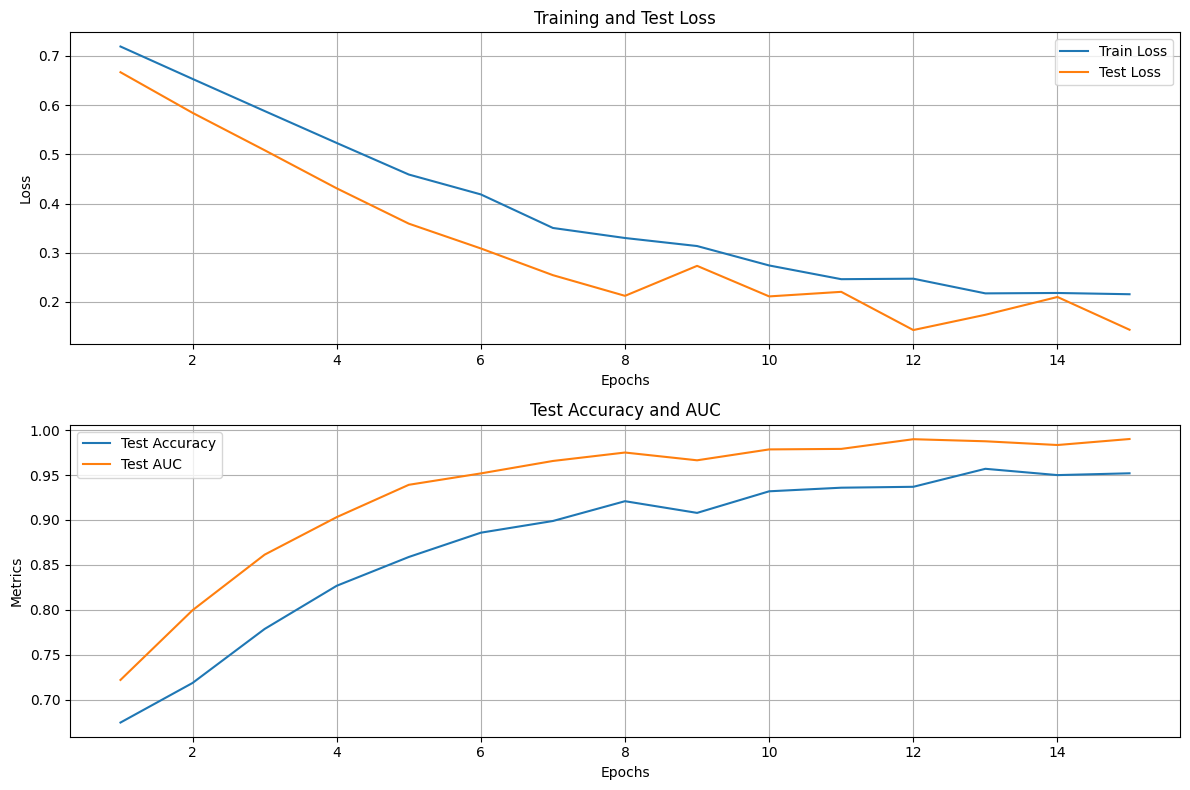

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize variables to track metrics
train_losses = []
test_losses = []
test_accuracies = []
test_roc_aucs = []

# Training and Evaluation Loop
num_epochs = 15
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.unsqueeze(1).float().to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()
        
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation Phase
    model.eval()
    all_outputs = []
    all_labels = []
    test_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.unsqueeze(1).float().to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()

            # Collect predictions and ground truth
            all_outputs.append(outputs.cpu())
            all_labels.append(labels.cpu())

    # Convert to single tensors
    all_outputs = torch.cat(all_outputs).squeeze()
    all_labels = torch.cat(all_labels).squeeze()

    # Calculate Metrics
    avg_test_loss = test_running_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    predictions = torch.sigmoid(all_outputs) > 0.5  # Binary predictions
    accuracy = accuracy_score(all_labels, predictions)
    roc_auc = roc_auc_score(all_labels, torch.sigmoid(all_outputs))

    test_accuracies.append(accuracy)
    test_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f} | "
          f"Accuracy: {accuracy:.4f} | AUC: {roc_auc:.4f}")

# Plot Metrics
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 8))

# Loss Plot
plt.subplot(2, 1, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid()

# Accuracy and AUC Plot
plt.subplot(2, 1, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.plot(epochs, test_roc_aucs, label='Test AUC')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Test Accuracy and AUC')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


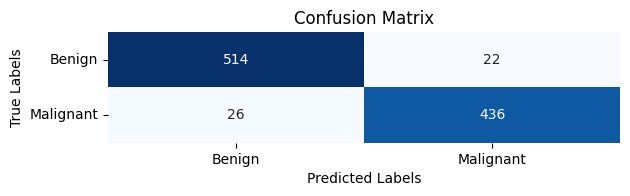

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.96       536
   Malignant       0.95      0.94      0.95       462

    accuracy                           0.95       998
   macro avg       0.95      0.95      0.95       998
weighted avg       0.95      0.95      0.95       998



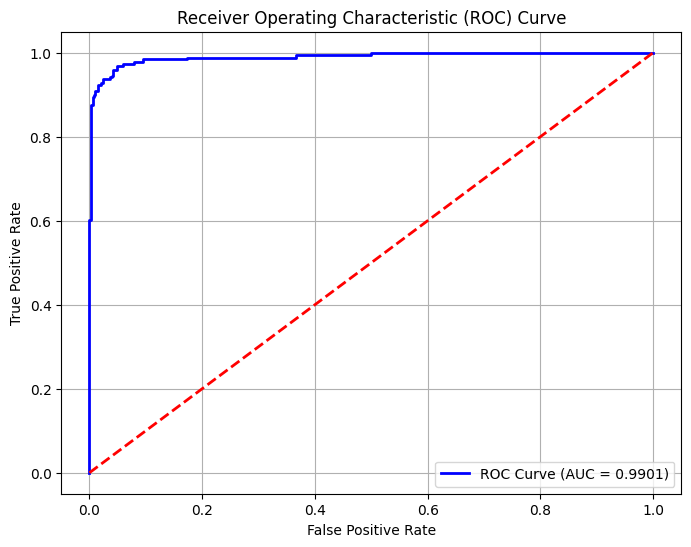

In [10]:
import seaborn as sns

from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)
probabilities = torch.sigmoid(all_outputs)
predictions = probabilities > 0.5  # Binary predictions

# Final Evaluation on Test Set
conf_matrix = confusion_matrix(all_labels, predictions)
report = classification_report(all_labels, predictions, target_names=["Benign", "Malignant"])

# Confusion Matrix Plot
plt.subplot(3, 1, 3)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

# Print Classification Report
print("Classification Report:")
print(report)

# ROC Curve Plot
fpr, tpr, _ = roc_curve(all_labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [11]:
# Check Trainable and Frozen Parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Frozen Parameters: {frozen_params:,}")



Total Parameters: 17,778,249
Trainable Parameters: 8,865,861
Frozen Parameters: 8,912,388


In [12]:
MODEL_SAVE_PATH = "efficientnetb4_cbis_trained_model.pth"

# Save the model's state_dict
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved successfully to {MODEL_SAVE_PATH}")

Model saved successfully to efficientnetb4_cbis_trained_model.pth
